[Text(0.4, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'Age <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

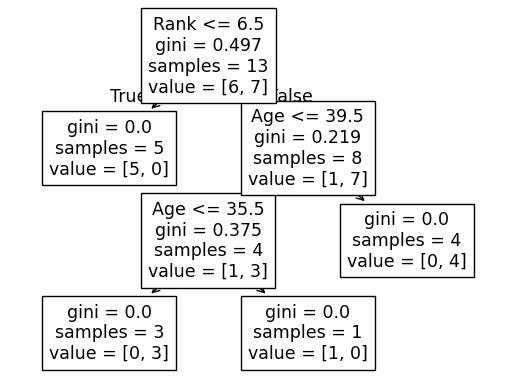

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\burge\Desktop\Book1.csv",
                 sep=";")
# In this example, a person will try to decide if he/she should go to a comedy show or not.
# To make a decision tree, all data has to be numerical.
# Convert Strings to numerical values
d = {"UK": 0, "USA": 1, "N": 2}
df["Nationality"] = df["Nationality"].map(d)
d = {"NO": 0, "YES": 1}
df["Go"] = df["Go"].map(d)

features = ["Age", "Experience", "Rank", "Nationality"]
X = df[features]
y = df["Go"]

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)
tree.plot_tree(dtree, feature_names=features)

In [53]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
df = pd.read_csv(r"~\Downloads\videolist_search50_2025_11_26-15_00_56.csv")
print(f"In the read document, there are {df.shape[0]} rows and {df.shape[1]} columns")

In the read document, there are 50 rows and 29 columns


In [54]:
"""
formatting headers
"""
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())

['position', 'channelid', 'channeltitle', 'videoid', 'publishedat', 'publishedatsql', 'videotitle', 'videodescription', 'tags', 'videocategoryid', 'videocategorylabel', 'topiccategories', 'duration', 'durationsec', 'dimension', 'definition', 'caption', 'defaultlanguage', 'defaultlaudiolanguage', 'thumbnail_maxres', 'licensedcontent', 'locationdescription', 'latitude', 'longitude', 'viewcount', 'likecount', 'dislikecount', 'favoritecount', 'commentcount']


In [55]:
"""
deleting unnecessesary columns
"""

df_dropped = df.drop(columns=['position', 'channelid', 'videoid', 'publishedatsql', 'videodescription', 'tags', 'videocategoryid', 'videocategorylabel', 
                   'topiccategories', 'dimension', 'definition', 'caption', 'defaultlanguage', 'thumbnail_maxres', 'licensedcontent', 'locationdescription', 'latitude', 
                   'longitude', 'favoritecount', "dislikecount", "commentcount", "durationsec"]) #the last 2 are only deleted for NOW because linear regression!!
df = df_dropped
df = df.drop(0)


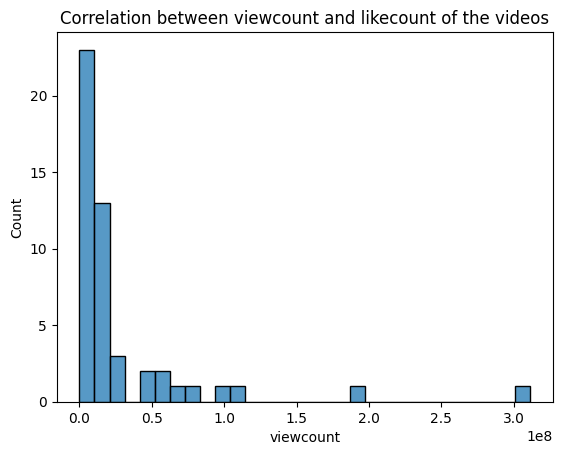

In [56]:
# ANALYSIS
df.describe()
plt.title("Correlation between viewcount and likecount of the videos")
sns.histplot(df["viewcount"])
plt.show()

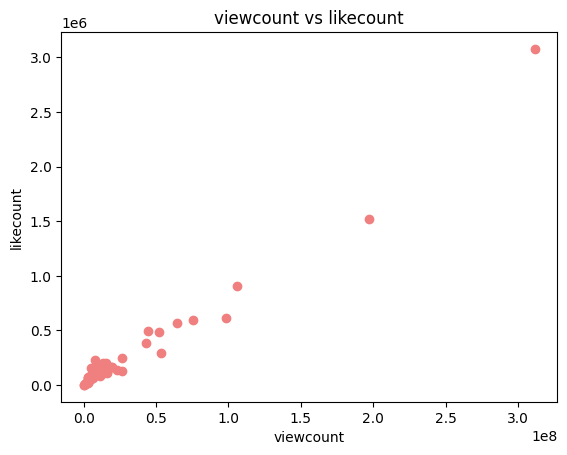

In [57]:
# Relationship between viewcount and likecount
plt.scatter(df['viewcount'], df['likecount'], color = 'lightcoral')
plt.title('viewcount vs likecount')
plt.xlabel('viewcount')
plt.ylabel('likecount')
plt.box(True)
plt.show()

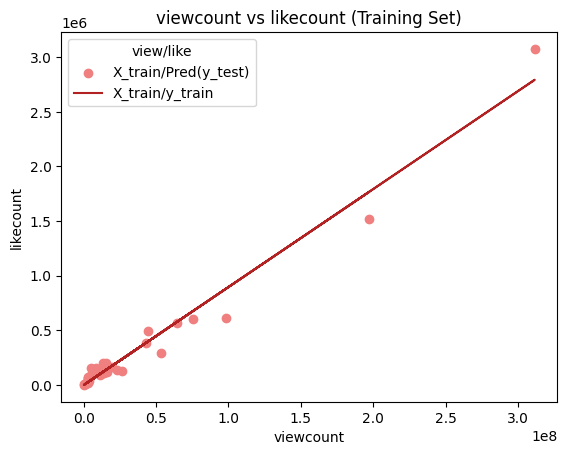

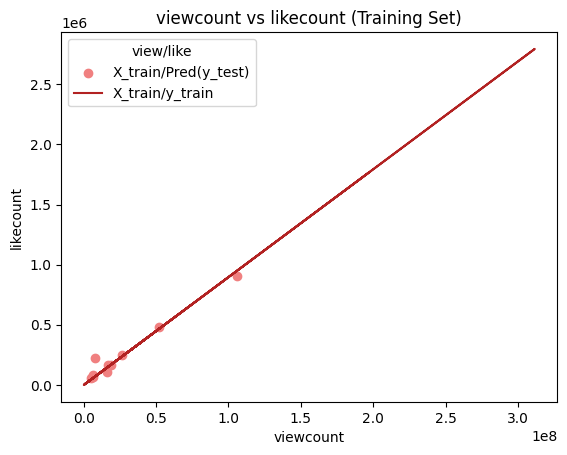

In [96]:
# split dataset into dependent and independent variables

X = df.iloc[:, 5:6] #independent
y = df.iloc[:, 6:] #dependent



# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train


# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('viewcount vs likecount (Training Set)')
plt.xlabel("viewcount")
plt.ylabel('likecount')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'view/like', loc='best', facecolor='white')
plt.box(True)
plt.show()

# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('viewcount vs likecount (Training Set)')
plt.xlabel("viewcount")
plt.ylabel('likecount')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'view/like', loc='best', facecolor='white')
plt.box(True)
plt.show()

